In [4]:
#load modules
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
from tqdm.notebook import tqdm
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe

#set plotting style
%matplotlib inline
font = {'weight':'normal',
       'size':20}

matplotlib.rc('font',**font)
matplotlib.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings("ignore")

### 1. Generate GMSL comparison Figure 2b

**Source data from:**

Creel, R.C., Austermann, J., Kopp, R.E., Khan, N.S., Albrecht, T. and Kingslake, J., 2024. Global mean sea level likely higher than present during the holocene. Nature Communications, 15(1), p.10731.

Lambeck, K., Rouby, H., Purcell, A., Sun, Y. and Sambridge, M., 2014. Sea level and global ice volumes from the Last Glacial Maximum to the Holocene. Proceedings of the National Academy of Sciences, 111(43), pp.15296-15303.

Peltier, W.R., Argus, D.F. and Drummond, R., 2015. Space geodesy constrains ice age terminal deglaciation: The global ICE‐6G_C (VM5a) model. Journal of Geophysical Research: Solid Earth, 120(1), pp.450-487.

Bradley, S.L., Milne, G.A., Horton, B.P. and Zong, Y., 2016. Modelling sea level data from China and Malay-Thailand to estimate Holocene ice-volume equivalent sea level change. Quaternary Science Reviews, 137, pp.54-68.

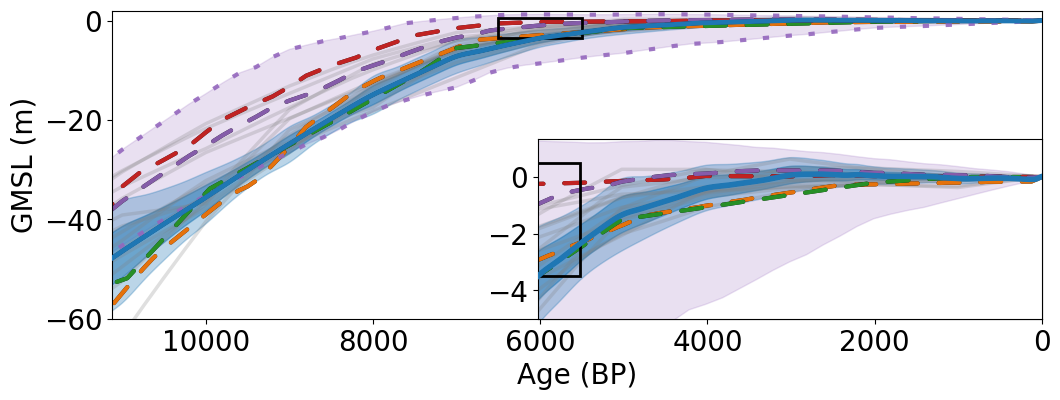

In [5]:


# Load the dataset
ds = xr.open_dataset("../data/sea_level_plot_data.nc")

# Extract data for plotting
all_bsl_out = -ds.tested_bsls.values  # Note: we stored as negative, so negate again
all_rsl_time = ds.time.values
ESL_time = ds.time_anu
ESL = ds.anu_esl
bradley_2016_x = ds.time_bradley / 1000  # Convert back to original scale
bradley_2016_y = ds.bradley_2016
ice6g_esl_time = ds.time_ice6g / 1000  # Convert back to original scale
ice6g_esl = ds.ice6g_esl
creel_2025_x = ds.time_creel / 1000  # Convert back to original scale
creel_2025_y_dis = np.stack([ds.creel_2025_lower, 
                           ds.creel_2025_lower,  # Placeholder for unused column
                           ds.creel_2025_mean,
                           ds.creel_2025_upper,  # Placeholder for unused column
                           ds.creel_2025_upper], axis=1)
pred_matrix = np.column_stack([ds.time_pred, ds.global_mean])  # Recreate as 2D array
global_mean = ds.global_mean
global_std = ds.global_std

# Original plotting code
pe = [mpe.withStroke(linewidth=4, foreground="k")]
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(111)

# Plot tested BSLs
for i in range(13):
    if i==0:
        plt.plot(all_rsl_time, -all_bsl_out[i], color='grey', alpha=0.25, 
                linewidth=2.5, label='Tested BSLs')
    else:
        plt.plot(all_rsl_time, -all_bsl_out[i], color='grey', alpha=0.25, 
                linewidth=2.5)

pe = [mpe.withStroke(linewidth=3, foreground="k")]
plt.plot(ESL_time.values, ESL.values, linewidth=3, label='ANU', color='C1', 
        linestyle='--', alpha=0.9, dashes=(5,5), dash_capstyle='round', 
        path_effects=pe)
plt.plot(np.array(bradley_2016_x)*1000, bradley_2016_y, linewidth=3, 
        label='Bradley et al., 2016', color='C2', linestyle='--', alpha=0.9, 
        dashes=(5,5), dash_capstyle='round', path_effects=pe)
plt.plot(ice6g_esl_time*1000, ice6g_esl, linewidth=3, label='ICE6G', color='C3', 
        linestyle='--', alpha=0.9, dashes=(5,5), dash_capstyle='round', 
        path_effects=pe)
plt.plot(creel_2025_x*1000, creel_2025_y_dis[:,2], linewidth=3, label='Creel ESL', 
        color='C4', linestyle='--', alpha=0.9, dashes=(5,5), dash_capstyle='round', 
        path_effects=pe)
plt.fill_between(creel_2025_x*1000, creel_2025_y_dis[:,0], creel_2025_y_dis[:,-1], 
                color='C4', alpha=0.2)
plt.plot(creel_2025_x*1000, creel_2025_y_dis[:,0], linewidth=3, label='Creel ESL', 
        color='C4', linestyle=':', alpha=0.9, dashes=(1.5,4))
plt.plot(creel_2025_x*1000, creel_2025_y_dis[:,-1], linewidth=3, label='Creel ESL', 
        color='C4', linestyle=':', alpha=0.9, dashes=(1.5,4))

plt.plot(pred_matrix[:,0], global_mean, color='C0', linewidth=3.5, 
        path_effects=pe, zorder=10)
plt.fill_between(pred_matrix[:,0], global_mean-global_std, global_mean+global_std, 
                color='C0', alpha=0.5)
plt.fill_between(pred_matrix[:,0], global_mean-global_std*2, global_mean+global_std*2, 
                color='C0', alpha=0.3)

ax.add_patch(plt.Rectangle((5500, -3.5), 1000, 4, 
                          fill=True, fc='None', ec='k', linewidth=2, zorder=5))
plt.hlines(0, 0, 12, linestyle=':', color='k')
plt.xlim(11125, 0)
ax.set_yticks(np.arange(-60, 1, 20))
plt.ylim(-60, 2)
plt.xlabel('Age (BP)')
plt.ylabel('GMSL (m)')
# Inset plot
left, bottom, width, height = 0.48, 0.110, 0.42, 0.45
ax2 = fig.add_axes([left, bottom, width, height])
ax2.tick_params(labelbottom=False)    
ax2.tick_params(labelleft=True)    
ax2.set_xticks([])
ax2.set_yticks([-4, -2, 0])
ax2.set_xlim(6000, 0)
ax2.set_ylim(-5, 1.35)

for i in range(13):
    if i==0:
        ax2.plot(all_rsl_time, -all_bsl_out[i], color='grey', alpha=0.25, 
                linewidth=2.5, label='Tested BSLs')
    else:
        ax2.plot(all_rsl_time, -all_bsl_out[i], color='grey', alpha=0.25, 
                linewidth=2.5)

pe = [mpe.withStroke(linewidth=3, foreground="k")]
ax2.plot(ESL_time.values, ESL.values, linewidth=3, label='ANU', color='C1', 
        linestyle='--', alpha=0.9, dashes=(5,5), dash_capstyle='round', 
        path_effects=pe)
ax2.plot(np.array(bradley_2016_x)*1000, bradley_2016_y, linewidth=3, 
        label='Bradley et al., 2016', color='C2', linestyle='--', alpha=0.9, 
        dashes=(5,5), dash_capstyle='round', path_effects=pe)
ax2.plot(ice6g_esl_time*1000, ice6g_esl, linewidth=3, label='ICE6G', color='C3', 
        linestyle='--', alpha=0.9, dashes=(5,5), dash_capstyle='round', 
        path_effects=pe)
ax2.plot(creel_2025_x*1000, creel_2025_y_dis[:,2], linewidth=3, label='Creel ESL', 
        color='C4', linestyle='--', alpha=0.9, dashes=(5,5), dash_capstyle='round', 
        path_effects=pe)
ax2.fill_between(creel_2025_x*1000, creel_2025_y_dis[:,0], creel_2025_y_dis[:,-1], 
                color='C4', alpha=0.2)
ax2.plot(pred_matrix[:,0], global_mean, color='C0', linewidth=4, zorder=10, 
        path_effects=pe)
ax2.fill_between(pred_matrix[:,0], global_mean-global_std, global_mean+global_std, 
                color='C0', alpha=0.5)
ax2.fill_between(pred_matrix[:,0], global_mean-global_std*2, global_mean+global_std*2, 
                color='C0', alpha=0.3)
ax2.add_patch(plt.Rectangle((5500, -3.5), 1000, 4, 
                           fill=True, fc='None', ec='k', linewidth=2, zorder=5))

plt.show()


### 2. Generate GMSL rate variation plots (Figure 4a)

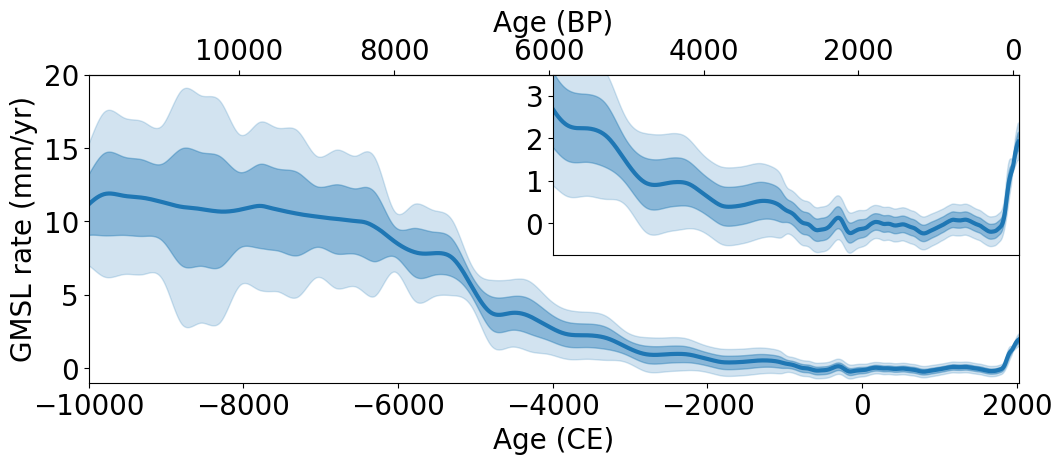

In [10]:

# Load the dataset
ds = xr.open_dataset("../data/gmsl_rate_data.nc")

# Extract data for plotting
CE_rsl_gl_rate_time = ds.time.values
mean_rate = ds.mean_rate.values
lower_1std = ds.lower_1std.values
upper_1std = ds.upper_1std.values
lower_2std = ds.lower_2std.values
upper_2std = ds.upper_2std.values

# Recreate the original plot
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(111)

# Main plot
plt.plot(CE_rsl_gl_rate_time, mean_rate, color='C0', linewidth=3)
plt.fill_between(CE_rsl_gl_rate_time, lower_1std, upper_1std, 
                color='C0', alpha=0.4)
plt.fill_between(CE_rsl_gl_rate_time, lower_2std, upper_2std, 
                color='C0', alpha=0.2)

plt.xlim(-10000, 2020)
plt.ylim(-1, 20)
plt.xlabel('Age (CE)')
plt.ylabel('GMSL rate (mm/yr)')

# Secondary x-axis at the top in BP (relative to 1950)
secax = ax.secondary_xaxis('top')
tick_positions_ce = [1950, -50, -2050, -4050, -6050, -8050, -10050]  # Original CE positions
tick_positions_bp = [1950 - ce for ce in tick_positions_ce]  # Convert to BP (1950 - CE)
secax.set_xticks(tick_positions_ce)  # Set tick positions in CE for plotting
secax.set_xticklabels([str(bp) for bp in tick_positions_bp])  # Show BP labels
secax.set_xlabel('Age (BP)')

# Inset plot
left, bottom, width, height = 0.512, 0.430, 0.388, 0.45
ax2 = fig.add_axes([left, bottom, width, height])
ax2.tick_params(labelbottom=True)    
ax2.tick_params(labelleft=True)    
ax2.set_xticks([])
ax2.set_yticks([0, 1, 2, 3])
ax2.set_xlim(-4000, 2020)
ax2.set_ylim(-0.75, 3.5)

plt.plot(CE_rsl_gl_rate_time, mean_rate, color='C0', linewidth=3)
plt.fill_between(CE_rsl_gl_rate_time, lower_1std, upper_1std, 
                color='C0', alpha=0.4)
plt.fill_between(CE_rsl_gl_rate_time, lower_2std, upper_2std, 
                color='C0', alpha=0.2)

# Save the figure
plt.show()